In [1]:
import praw
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
reddit = praw.Reddit(client_id='tdFtrPP5jClc65G6mBQJGw', client_secret='EeKKgJHiQaTVpoPAPfhUN-X1vIsX8A', user_agent='webscrapping')

Version 7.6.1 of praw is outdated. Version 7.7.0 was released Saturday February 25, 2023.


In [3]:
headlines = set()

In [4]:
for submission in reddit.subreddit('politics').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

981


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': -0.8126,
  'headline': 'Tennessee lawmakers stripped of committees after joining gun violence protests',
  'neg': 0.545,
  'neu': 0.455,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Kids Are Begging, Begging, Begging For Their Lives',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': "Trump says Putin will 'ultimately' take over all of Ukraine",
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [6]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.545,0.455,0.000,-0.8126,Tennessee lawmakers stripped of committees aft...
1,0.000,1.000,0.000,0.0000,"Kids Are Begging, Begging, Begging For Their L..."
2,0.000,1.000,0.000,0.0000,Trump says Putin will 'ultimately' take over a...
3,0.170,0.752,0.077,-0.6908,Utah lawmakers say they want to protect kids. ...
4,0.444,0.556,0.000,-0.7351,Tennessee GOP Expel 2 House Dems Who Called Fo...


In [7]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.545,0.455,0.000,-0.8126,Tennessee lawmakers stripped of committees aft...,-1
1,0.000,1.000,0.000,0.0000,"Kids Are Begging, Begging, Begging For Their L...",0
2,0.000,1.000,0.000,0.0000,Trump says Putin will 'ultimately' take over a...,0
3,0.170,0.752,0.077,-0.6908,Utah lawmakers say they want to protect kids. ...,-1
4,0.444,0.556,0.000,-0.7351,Tennessee GOP Expel 2 House Dems Who Called Fo...,-1


In [8]:
df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [9]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['The Supreme Court’s Ginni Thomas problem is bigger than legal ethics Unaccountable donors are mainstreaming her favorite conspiracy theories, which demonize fellow Americans.',
 'Clarence Thomas Ruled on Bribery Case While Accepting Vacations',
 'Biden to visit Ireland, mark Good Friday accord anniversary',
 'Liberal Janet Protasiewicz Declared Winner Over Daniel Kelly in Closely Watched Wisconsin Supreme Court Race',
 'Love him? Hate him? For Donald Trump, attention is attention']

Negative headlines:

['Tennessee lawmakers stripped of committees after joining gun violence protests',
 'Utah lawmakers say they want to protect kids. Here are the gun laws the Legislature did — and didn’t — pass. Firearms have surpassed car accidents as the leading cause of death among children and '
 'adolescents, according to the Centers for Disease Control and Prevention.',
 'Tennessee GOP Expel 2 House Dems Who Called For Gun Control With Protesters',
 'DeSantis Book Event Derai

In [10]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 0    402
-1    366
 1    214
Name: label, dtype: int64
 0    40.936864
-1    37.270876
 1    21.792261
Name: label, dtype: float64


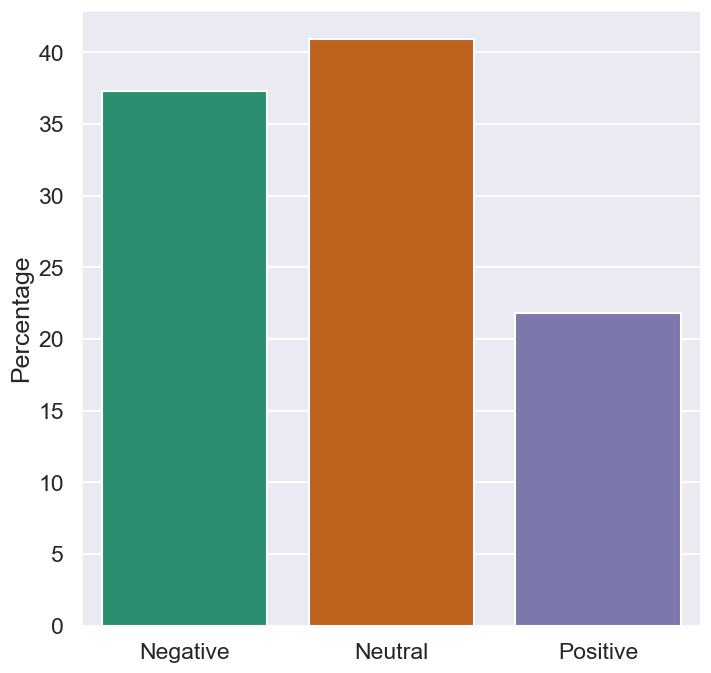

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

Creating a Model 

In [12]:
#Perform text Preprocessing
import pandas as pd
import nltk

In [13]:
df = pd.read_csv('/Users/nikhilthakur/Desktop/NLP/redditscrappeddata.txt',delimiter='\t')

In [14]:
df

,"{'""Jaw-dropping"": Experts stunned after report reveals new tape of Trump pressuring Georgia official',"
0,"'""Tiger King"" Joe Exotic announces 2024 presi..."
1,"'$200 million housing, homelessness package s..."
2,'\'Champion for Working Families\': Bernie Sa...
3,'\'Educators Are Nation Builders\': Sanders B...
4,"""'History will hold Donald Trump accountable'..."
...,...
959,'‘Toxic political ideology’: Florida professo...
960,'‘Unprecedented:’ Legislature expected to OK ...
961,'‘You think I’m crazy?’ Florida GOP sweats Tr...
962,"""“His defense is a confession”: Ex-prosecutor..."


In [15]:
import nltk
from nltk.corpus import PlaintextCorpusReader

In [16]:
path = '/Users/nikhilthakur/Desktop/NLP/redditscrappeddata.txt'

In [17]:
corpus = PlaintextCorpusReader(path, '.*')

In [18]:
text = corpus.raw(path)

In [19]:
print(text[:100])

{'"Jaw-dropping": Experts stunned after report reveals new tape of Trump pressuring Georgia official


In [20]:
#removing punctuation 

import string
text_no_punct = text.translate(str.maketrans("", "", string.punctuation))

In [21]:
print(text_no_punct)

Jawdropping Experts stunned after report reveals new tape of Trump pressuring Georgia official
 Tiger King Joe Exotic announces 2024 presidential run
 200 million housing homelessness package sails through Oregon House
 Champion for Working Families Bernie Sanders Backs Brandon Johnson for Chicago Mayor Johnson is not afraid to stand up for strong unions and make big corporations and the rich pay their fair share said the Vermont senator
 Educators Are Nation Builders Sanders Bill Would Ensure Minimum 60K Salary for All Teachers The situation has become so absurd that the top 15 hedge fund managers on Wall Street make more money in a single year than every kindergarten teacher in America combined
 History will hold Donald Trump accountable for Jan 6 Pence says
 I Will Burn the Session to the Ground Over AntiTrans Bill Says Nebraska Democrat
 I could never vote for Trump again In suburban Cincinnati Republicans divided over 2024 run
 Im really really sorry Tennessee Lt Gov Randy McNally

In [22]:
#removing special characters
import re
text_no_special = re.sub('[^A-Za-z0-9]+', ' ', text_no_punct)

In [23]:
text_no_special

'Jawdropping Experts stunned after report reveals new tape of Trump pressuring Georgia official Tiger King Joe Exotic announces 2024 presidential run 200 million housing homelessness package sails through Oregon House Champion for Working Families Bernie Sanders Backs Brandon Johnson for Chicago Mayor Johnson is not afraid to stand up for strong unions and make big corporations and the rich pay their fair share said the Vermont senator Educators Are Nation Builders Sanders Bill Would Ensure Minimum 60K Salary for All Teachers The situation has become so absurd that the top 15 hedge fund managers on Wall Street make more money in a single year than every kindergarten teacher in America combined History will hold Donald Trump accountable for Jan 6 Pence says I Will Burn the Session to the Ground Over AntiTrans Bill Says Nebraska Democrat I could never vote for Trump again In suburban Cincinnati Republicans divided over 2024 run Im really really sorry Tennessee Lt Gov Randy McNally apolog

In [24]:
#converting text into lower case

text_lower = text_no_special.lower()

In [25]:
text_lower

'jawdropping experts stunned after report reveals new tape of trump pressuring georgia official tiger king joe exotic announces 2024 presidential run 200 million housing homelessness package sails through oregon house champion for working families bernie sanders backs brandon johnson for chicago mayor johnson is not afraid to stand up for strong unions and make big corporations and the rich pay their fair share said the vermont senator educators are nation builders sanders bill would ensure minimum 60k salary for all teachers the situation has become so absurd that the top 15 hedge fund managers on wall street make more money in a single year than every kindergarten teacher in america combined history will hold donald trump accountable for jan 6 pence says i will burn the session to the ground over antitrans bill says nebraska democrat i could never vote for trump again in suburban cincinnati republicans divided over 2024 run im really really sorry tennessee lt gov randy mcnally apolog

In [26]:
#Tokenization of sentences
sentences = nltk.sent_tokenize(text_lower)

In [27]:
len(sentences)


1

In [28]:
#tokenisation of words
tokens = nltk.word_tokenize(text_lower)

In [29]:
len(tokens)

12538

In [30]:
#removing stop words

from nltk.corpus import stopwords
tokens_no_stop = [token for token in tokens if token.lower() not in stopwords.words('english')]


In [31]:
#print most common words
counter_dict = nltk.FreqDist(tokens_no_stop)

In [32]:
print(counter_dict.most_common(15))

[('trump', 161), ('biden', 123), ('desantis', 84), ('gop', 78), ('bill', 77), ('says', 70), ('republicans', 65), ('us', 61), ('new', 60), ('house', 55), ('florida', 54), ('bank', 49), ('would', 43), ('abortion', 38), ('ron', 38)]


In [33]:
#feature extrction


word_features = [w[0] for w in counter_dict.most_common(3000)]

In [34]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
wnl = WordNetLemmatizer()

def preprocess_text(text_lower):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Stem words
    words = [ps.stem(word) for word in words]
    # Lemmatize words
    words = [wnl.lemmatize(word) for word in words]
    # Join the words back into a single string separated by space
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikhilthakur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nikhilthakur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
words = preprocess_text()

TypeError: preprocess_text() missing 1 required positional argument: 'text_lower'

In [36]:
import nltk
nltk.download('punkt')

# Replace "paragraph" with the variable name that stores your paragraph
paragraph = text_lower

# Tokenize the paragraph into sentences
sentences = nltk.sent_tokenize(paragraph)

# Tokenize each sentence into words
words = [nltk.word_tokenize(sentence) for sentence in sentences]

# Print the tokenized words
print(words)


[['jawdropping', 'experts', 'stunned', 'after', 'report', 'reveals', 'new', 'tape', 'of', 'trump', 'pressuring', 'georgia', 'official', 'tiger', 'king', 'joe', 'exotic', 'announces', '2024', 'presidential', 'run', '200', 'million', 'housing', 'homelessness', 'package', 'sails', 'through', 'oregon', 'house', 'champion', 'for', 'working', 'families', 'bernie', 'sanders', 'backs', 'brandon', 'johnson', 'for', 'chicago', 'mayor', 'johnson', 'is', 'not', 'afraid', 'to', 'stand', 'up', 'for', 'strong', 'unions', 'and', 'make', 'big', 'corporations', 'and', 'the', 'rich', 'pay', 'their', 'fair', 'share', 'said', 'the', 'vermont', 'senator', 'educators', 'are', 'nation', 'builders', 'sanders', 'bill', 'would', 'ensure', 'minimum', '60k', 'salary', 'for', 'all', 'teachers', 'the', 'situation', 'has', 'become', 'so', 'absurd', 'that', 'the', 'top', '15', 'hedge', 'fund', 'managers', 'on', 'wall', 'street', 'make', 'more', 'money', 'in', 'a', 'single', 'year', 'than', 'every', 'kindergarten', 'te

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nikhilthakur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
import pandas as pd

# Replace "clean_text" with the variable name that stores your clean text data
clean_text = words

# Create a pandas dataframe to store the clean text data
df = pd.DataFrame({'text': clean_text})

# Export the dataframe to a CSV file
df.to_csv('clean_text_data.csv', index=False)


In [38]:
# Import the necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the text data into a pandas dataframe
text_data = pd.read_csv('/Users/nikhilthakur/Desktop/NLP/clean_text_data.csv')

# Preprocess the text data
# e.g. remove stopwords, perform stemming or lemmatization, etc.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_data['text'], text_data['sentiment'], test_size=0.2, random_state=42)

# Convert the text data into numerical feature vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Train a logistic regression model on the training set
model = LogisticRegression(max_iter=10000)
model.fit(X_train_vectors, y_train)

# Evaluate the performance of the model on the testing set
y_pred = model.predict(X_test_vectors)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


KeyError: 'sentiment'

In [45]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the pre-trained model and tokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Define the text to analyze
text = 'movie was amazing'

# Tokenize the text and convert it to a tensor
inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")

# Perform the sentiment analysis
outputs = model(**inputs)
probas = torch.softmax(outputs.logits, dim=1).detach().numpy()[0]
sentiment_label = "positive" if probas[1] > probas[0] else "negative"

print(f"The sentiment of the text is {sentiment_label}.")


The sentiment of the text is positive.


In [48]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import streamlit as st

# Load the pre-trained model and tokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create the Streamlit web application
st.title("Sentiment Analysis App")
text_input = st.text_input("Enter text to analyze", value="movie was amazing")
if st.button("Analyze"):
    # Tokenize the text and convert it to a tensor
    inputs = tokenizer(text_input, padding=True, truncation=True, return_tensors="pt")

    # Perform the sentiment analysis
    outputs = model(**inputs)
    probas = torch.softmax(outputs.logits, dim=1).detach().numpy()[0]
    sentiment_label = "positive" if probas[1] > probas[0] else "negative"

    # Display the result
    st.write(f"The sentiment of the text is {sentiment_label}.")


2023-04-06 23:44:42.359 
  command:

    streamlit run /Users/nikhilthakur/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [47]:
pip install streamlit


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 3.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.8/982.8 kB 5.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 5.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

    Uninstalling protobuf-4.22.1:
      Successfully uninstalled protobuf-4.22.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.3.3 requires pyqt5<5.16, which is not installed.
spyder 5.3.3 requires pyqtwebengine<5.16, which is not installed.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [51]:
import streamlit as st
import pandas as pd
import numpy as np